Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [31]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [32]:
def line_br_removal(df):
    df['description'] = df['description'].str.strip('\n')
    return df

In [33]:
line_br_removal(train)

,id,description,ratingCategory
0,1321,"Sometimes, when whisky is batched, a few lefto...",1
1,3861,An uncommon exclusive bottling of a 6 year old...,0
2,655,This release is a port version of Amrut’s Inte...,1
3,555,This 41 year old single cask was aged in a she...,1
4,1965,"Quite herbal on the nose, with aromas of dried...",1
...,...,...,...
4082,3342,What lies beneath the surface of Dewar’s? Here...,1
4083,3130,After 6 to 7 years of maturation in bourbon ca...,1
4084,2811,"Bright, delicate, and approachable. While not ...",1
4085,478,I’m calling this the pitmaster’s dram: the nos...,1


### Define Pipeline Components

In [51]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import pickle

In [46]:
nlp = spacy.load('en_core_web_lg')
def tokenize(document):
    """ get the lemma and tokenize"""
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop is False) and (token.is_punct is False)]

In [49]:
# Takes raw text and turns it into vectors
vect =TfidfVectorizer(stop_words='english', ngram_range=(1,3), tokenizer=tokenize)
clf = RandomForestClassifier()

# Pipeline instead of make_pipeline has less overhead...
pipe = Pipeline([# Vectorizer,   # Classifier
                ('vect', vect), ('clf', clf)
                ])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [ ]:
parameters = {
    # name of pipeline component __ parameter: pass values
    'vect__max_df': ( 0.75, 1.0),
#     'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, verbose=1)
# verbose prints results
grid_search.fit(train['description'], train['ratingCategory'])

In [35]:
grid_search.best_score_

0.7193575996624301

In [ ]:
0.7176446118 train score led to a 0.70588 test score

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [40]:
line_br_removal(test)

,id,description
0,3461,Style: Speyside single malt scotch Color: Waln...
1,2604,"Very bright and lively, with a nice balance of..."
2,3341,A new oloroso-forward Chivas positioned to spl...
3,3764,Aged in bourbon casks and then enhanced in Rio...
4,2306,"There is a freshness to the wood on the nose, ..."
...,...,...
1017,2853,"Care for a small batch, bourbon-matured blend ..."
1018,219,"This is the pick of the bunch, the whisky equi..."
1019,1286,"Port Ellen, for sure! Very old-fashioned in na..."
1020,2201,"Youthful and very lively. Bold, crisp, spices ..."


In [36]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [37]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [38]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [21]:
subNumber = 0

In [39]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [72]:
from sklearn.decomposition import TruncatedSVD

vect =TfidfVectorizer(stop_words='english', ngram_range=(1,3), tokenizer=tokenize)
svd = TruncatedSVD(n_components=100, # Just here for demo. 
                   algorithm='randomized',
                   n_iter=10)

In [62]:
lsi = Pipeline([('vect', vect), ('svd', svd)])
vect =TfidfVectorizer(stop_words='english', ngram_range=(1,3), tokenizer=tokenize)
clf = RandomForestClassifier()

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [75]:
vect.get_params().keys()

dict_keys(['analyzer', 'binary', 'decode_error', 'dtype', 'encoding', 'input', 'lowercase', 'max_df', 'max_features', 'min_df', 'ngram_range', 'norm', 'preprocessor', 'smooth_idf', 'stop_words', 'strip_accents', 'sublinear_tf', 'token_pattern', 'tokenizer', 'use_idf', 'vocabulary'])

In [78]:
from collections import Counter
def count(docs):
    """
    Function that takes a corpus of document and returns and dataframe of word counts for us to analyze.
    """
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [83]:
doc = nlp(str(train['description']))
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(train['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_digit is False) & (token.is_punct is False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)

train['tokens'] = tokens
train

,id,description,ratingCategory,tokens
0,1321,"Sometimes, when whisky is batched, a few lefto...",1,"[sometimes,, whisky, batched,, leftover, barre..."
1,3861,An uncommon exclusive bottling of a 6 year old...,0,"[uncommon, exclusive, bottling, year, old, cas..."
2,655,This release is a port version of Amrut’s Inte...,1,"[release, port, version, amrut’s, intermediate..."
3,555,This 41 year old single cask was aged in a she...,1,"[year, old, single, cask, aged, sherry, butt, ..."
4,1965,"Quite herbal on the nose, with aromas of dried...",1,"[herbal, nose,, aromas, dried, tarragon,, pars..."
...,...,...,...,...
4082,3342,What lies beneath the surface of Dewar’s? Here...,1,"[lies, beneath, surface, dewar’s?, here,, blen..."
4083,3130,After 6 to 7 years of maturation in bourbon ca...,1,"[years, maturation, bourbon, casks,, spent, mo..."
4084,2811,"Bright, delicate, and approachable. While not ...",1,"[bright,, delicate,, approachable., showstoppe..."
4085,478,I’m calling this the pitmaster’s dram: the nos...,1,"[i’m, calling, pitmaster’s, dram:, nose, muscu..."


In [82]:
STOP_WORDS = nlp.Defaults.stop_words #.union('whiskey', 'glass', 'drink')

In [84]:

word_count = count(train.tokens)
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
84,sweet,1145,1339,1.0,0.007430,0.007430,0.280157
274,notes,1014,1152,2.0,0.006393,0.013823,0.248104
47,oak,932,1147,3.0,0.006365,0.020188,0.228040
201,finish.,1101,1116,4.0,0.006193,0.026381,0.269391
86,finish,1090,1111,5.0,0.006165,0.032546,0.266699


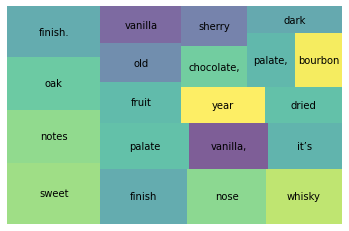

In [85]:

import squarify
import matplotlib.pyplot as plt

wc_top20 = word_count[word_count['rank'] <=20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7)
plt.axis('off')
plt.show()

In [73]:
parameters = {
    'lsi__svd__n_components': [10,100,250],
    
#     'vect__max_df': (0.75, 1.0),
    'clf__max_depth':(5,10,15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-3, verbose=1)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-3)]: Done  22 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-3)]: Done  60 out of  60 | elapsed:   40.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lsi',
                                        Pipeline(memory=None,
                                                 steps=[('vect',
                                                         TfidfVectorizer(analyzer='word',
                                                                         binary=False,
                                                                         decode_error='strict',
                                                                         dtype=<class 'numpy.float64'>,
                                                                         encoding='utf-8',
                                                                         input='content',
                                                                         lowercase=True,
                                                                         max_df=1.0,
             

In [74]:
grid_search.best_score_

0.7259620592961907

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

sub0 led to 0.705

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [1]:
# # Apply to your Dataset

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import GradientBoostingClassifier


# param_dist = {
    
#     'max_depth' : randint(3,10),
#     'min_samples_leaf': randint(2,15)
# }

In [86]:
# Continue Word Embedding Work Here
nlp = spacy.load("en_core_web_lg")
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [87]:
X = get_word_vectors(train['description'])

len(X) == len(train.description)

True

In [89]:
X_test = get_word_vectors(test['description'])
clf.fit(X, train['ratingCategory'])
clf.score(X, train['ratingCategory'])

1.0

In [91]:
test['ratingCategory'] = clf.predict(X_test)

In [93]:
test[['id', 'ratingCategory']].to_csv('WordEmbeddings.csv', header=True, index=False)

This got a score of 0.77124, training was 1 so I can't tell how to tweak
hold back some data for cross validation

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = ...predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?

randomsearch
from sklearn.util import resample

minority -trai trai raigitn ==2